In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [16]:
from keras.datasets import mnist
from keras.utils import to_categorical

(t_images, t_labels), (test_images, test_labels) = mnist.load_data()

t_images = t_images.reshape((60000, 28, 28, 1))
t_images = t_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

t_labels = to_categorical(t_labels)
test_labels = to_categorical(test_labels)

In [19]:
model.compile(optimizer='rmsprop', 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
history = model.fit(t_images, t_labels, epochs=5, batch_size=100)

Epoch 1/5
60000/60000 [==============================] - 37s 618us/step - loss: 0.0180 - acc: 0.9945
Epoch 2/5
60000/60000 [==============================] - 37s 609us/step - loss: 0.0137 - acc: 0.9957
Epoch 3/5
60000/60000 [==============================] - 45s 748us/step - loss: 0.0118 - acc: 0.9961
Epoch 4/5
60000/60000 [==============================] - 43s 713us/step - loss: 0.0100 - acc: 0.9970
Epoch 5/5
60000/60000 [==============================] - 43s 713us/step - loss: 0.0084 - acc: 0.9973


In [20]:
history_dict = history.history
history_dict.keys()

['acc', 'loss']

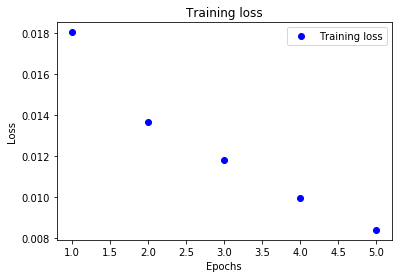

In [23]:
import matplotlib.pyplot as plt

loss_value = history_dict['loss']

epochs = range(1, len(loss_value) +1)

plt.plot(epochs, loss_value, 'bo', label="Training loss")
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

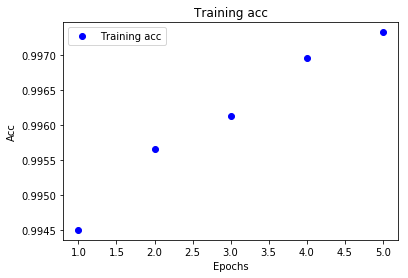

In [22]:
loss_value = history_dict['acc']
epochs = range(1, len(loss_value) +1)

plt.plot(epochs, loss_value, 'bo', label="Training acc")
plt.title('Training acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()